#                         Geiznomia Teknik Dökümanı - Veri Ön Hazırlığı ve İş Probleminin Belirlenmesi

## İş Problemi = Gezinomi State Group isimli şirketler grubu turizm ve otelcilik alanında farklı yatırımları bulunan bir firma. Firma yeni bir tatil köyü için yatırım yapmayı düşünüyor. 

##    Otelin; çalışma konsepti, açılacağı şehir ve fiyatlandırma konusunda desteğe ihtiyacı var. Yatırım danışmanlığı için firmamız Gezinomia'ya gelen şirket yatırım depertmanına gerekli bilgileri sağlayacağız.

##       Bunun için firmamız elde ettiği veri setini düzenleyerek anlamlı bir çıktı alacak hale getirecek. Çıktıları firmaya anlamlı bir şekilde ifade edebilmek için görselleştirmeler yapılacak.
## Daha sonra bir tahmin modeli geliştirerek farklı şehir seçimlerine göre hangi konseptte ne kadar başarılı olunabileceğini tahmin eden bir tahmin modeli geliştireceğiz. Bu model şehir isminin girdisiyle tavsiye edilen konseptin ve tavsiye edilen fiyatlandırmanın çıktısını verecek.

In [1]:
# Gerekli kütüphanelerin import edilmesi ile başlıyoruz.
import numpy as np
import pandas as pd
import re
import locale
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df_ = pd.read_csv("Desktop/MIUUL Veri Analisti/Gezinomia Final/gezinomi_csv.csv", encoding="utf-8")
# Dosyayı tarattıktan sonra Türkçe karakterlerin hata yarattığını gördük. Bu yüzden encoding düzenlemesi yapıyorum.
df_.head(10)
# Veri setimize genel bir bakış atıyoruz.

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleDate.1,CheckInDate.1,Price.1,ConceptName.1,SaleCityName.1,CInDay.1,SaleCheckInDayDiff.1,Seasons.1
0,415122,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"79,3040293",Her_ey Dahil,Antalya,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"79,3040293",Her_ey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"45,97069597",Yar�m Pansiyon,Antalya,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"45,97069597",Yar�m Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12 00:00:00.0000000,2022-09-13 00:00:00.0000000,"77,83882784",Her_ey Dahil,Antalya,Tuesday,1,High,2022-09-12 00:00:00.0000000,2022-09-13 00:00:00.0000000,"77,83882784",Her_ey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03 00:00:00.0000000,2022-12-10 00:00:00.0000000,"222,7106227",Yar�m Pansiyon,_zmir,Saturday,7,Low,2022-12-03 00:00:00.0000000,2022-12-10 00:00:00.0000000,"222,7106227",Yar�m Pansiyon,_zmir,Saturday,7,Low
4,414951,2022-12-01 00:00:00.0000000,2022-12-03 00:00:00.0000000,"140,4761905",Yar�m Pansiyon,_zmir,Saturday,2,Low,2022-12-01 00:00:00.0000000,2022-12-03 00:00:00.0000000,"140,4761905",Yar�m Pansiyon,_zmir,Saturday,2,Low
5,415091,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"70,26862027",Yar�m Pansiyon,_zmir,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"70,26862027",Yar�m Pansiyon,_zmir,Saturday,0,Low
6,415085,2022-12-03 00:00:00.0000000,2022-12-09 00:00:00.0000000,"45,78754579",Yar�m Pansiyon,Antalya,Friday,6,Low,2022-12-03 00:00:00.0000000,2022-12-09 00:00:00.0000000,"45,78754579",Yar�m Pansiyon,Antalya,Friday,6,Low
7,415084,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"51,23931624",Her_ey Dahil,Antalya,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"51,23931624",Her_ey Dahil,Antalya,Saturday,0,Low
8,415081,2022-12-03 00:00:00.0000000,2022-12-04 00:00:00.0000000,"77,28937729",Yar�m Pansiyon,_zmir,Sunday,1,Low,2022-12-03 00:00:00.0000000,2022-12-04 00:00:00.0000000,"77,28937729",Yar�m Pansiyon,_zmir,Sunday,1,Low
9,415079,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"68,68131868",Yar�m Pansiyon,Di_er,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"68,68131868",Yar�m Pansiyon,Di_er,Saturday,0,Low


In [3]:
# Orjinal veri setini korumak ve işlemlerimizi uygulamak için ilk aşamada bir kopya oluşturuyoruz.
df = df_.copy()

In [4]:
# encoding denemesinden sonra gördük ki Türkçe karakter sorunumuz halen mevcut. 
# Türkçe karakterlere düzenleme yapmak için bir fonksiyon oluşturuyoruz. Bu fonksiyonu oluştururken if döngüsü içinde replace fonksiyonunu ve re kütüphanesinin sub fonksiyonunu kullanıyoruz.
def fix_turkish_characters(text):
    if isinstance(text, str):
        # İlk harfi "_" olan yerleri "İ" ile değiştirelim
        if text.startswith("_"):
           text = "İ" + text[1:]
        text = text.replace("�", "ı")       
        text = re.sub(r"(?<=[a-zA-Z])_(?=[a-zA-Z])", "ş", text)
     # girdiğimiz "_"yı "ş" ile değiştirme fonksiyonu Birkaç şehir değişkenini bozduğu için onları o şekilde koruyarak replace fonksiyonu katıyoruz.   
        text = text.replace("Dişer","Diğer")
        text = text.replace ("Muşla", "Muğla")
        
    return text

    # Daha sonra bu fonksiyonu Türkçe karakterlerin sorun çıkarttığı sütunlara uyguluyoruz.
df["ConceptName"] = df["ConceptName"].apply(fix_turkish_characters)
df["SaleCityName"] = df["SaleCityName"].apply(fix_turkish_characters)
df["ConceptName.1"] = df["ConceptName.1"].apply(fix_turkish_characters)
df["SaleCityName.1"] = df["SaleCityName.1"].apply(fix_turkish_characters)
df.head(20)

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,SaleDate.1,CheckInDate.1,Price.1,ConceptName.1,SaleCityName.1,CInDay.1,SaleCheckInDayDiff.1,Seasons.1
0,415122,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"79,3040293",Herşey Dahil,Antalya,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"79,3040293",Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"45,97069597",Yarım Pansiyon,Antalya,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"45,97069597",Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12 00:00:00.0000000,2022-09-13 00:00:00.0000000,"77,83882784",Herşey Dahil,Antalya,Tuesday,1,High,2022-09-12 00:00:00.0000000,2022-09-13 00:00:00.0000000,"77,83882784",Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03 00:00:00.0000000,2022-12-10 00:00:00.0000000,"222,7106227",Yarım Pansiyon,İzmir,Saturday,7,Low,2022-12-03 00:00:00.0000000,2022-12-10 00:00:00.0000000,"222,7106227",Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01 00:00:00.0000000,2022-12-03 00:00:00.0000000,"140,4761905",Yarım Pansiyon,İzmir,Saturday,2,Low,2022-12-01 00:00:00.0000000,2022-12-03 00:00:00.0000000,"140,4761905",Yarım Pansiyon,İzmir,Saturday,2,Low
5,415091,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"70,26862027",Yarım Pansiyon,İzmir,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"70,26862027",Yarım Pansiyon,İzmir,Saturday,0,Low
6,415085,2022-12-03 00:00:00.0000000,2022-12-09 00:00:00.0000000,"45,78754579",Yarım Pansiyon,Antalya,Friday,6,Low,2022-12-03 00:00:00.0000000,2022-12-09 00:00:00.0000000,"45,78754579",Yarım Pansiyon,Antalya,Friday,6,Low
7,415084,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"51,23931624",Herşey Dahil,Antalya,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"51,23931624",Herşey Dahil,Antalya,Saturday,0,Low
8,415081,2022-12-03 00:00:00.0000000,2022-12-04 00:00:00.0000000,"77,28937729",Yarım Pansiyon,İzmir,Sunday,1,Low,2022-12-03 00:00:00.0000000,2022-12-04 00:00:00.0000000,"77,28937729",Yarım Pansiyon,İzmir,Sunday,1,Low
9,415079,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"68,68131868",Yarım Pansiyon,Diğer,Saturday,0,Low,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,"68,68131868",Yarım Pansiyon,Diğer,Saturday,0,Low


## * Veri setini anlaşılır ve daha kolay okunabilir hale getirdik. Şimdi veri setini daha yakından tanıyoruz.

In [6]:
# Veri setinin genişliği hakkında genel bilgi ediniyoruz.
df.shape

(59164, 17)

In [7]:
# Veri setini tanımak ve kolon isimlerini gözlemek için "info" komutunu kullanıyoruz. Null Count özelliği ve data type göstergesi de bize yardımcı oluyor.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59164 entries, 0 to 59163
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SaleId                59164 non-null  int64 
 1   SaleDate              59164 non-null  object
 2   CheckInDate           59164 non-null  object
 3   Price                 59151 non-null  object
 4   ConceptName           59164 non-null  object
 5   SaleCityName          59164 non-null  object
 6   CInDay                59164 non-null  object
 7   SaleCheckInDayDiff    59164 non-null  int64 
 8   Seasons               59164 non-null  object
 9   SaleDate.1            59164 non-null  object
 10  CheckInDate.1         59164 non-null  object
 11  Price.1               59151 non-null  object
 12  ConceptName.1         59164 non-null  object
 13  SaleCityName.1        59164 non-null  object
 14  CInDay.1              59164 non-null  object
 15  SaleCheckInDayDiff.1  59164 non-null

In [8]:
# Değişkenlerin data typelarını teker teker öğreniyoruz.
df.dtypes

SaleId                   int64
SaleDate                object
CheckInDate             object
Price                   object
ConceptName             object
SaleCityName            object
CInDay                  object
SaleCheckInDayDiff       int64
Seasons                 object
SaleDate.1              object
CheckInDate.1           object
Price.1                 object
ConceptName.1           object
SaleCityName.1          object
CInDay.1                object
SaleCheckInDayDiff.1     int64
Seasons.1               object
dtype: object

In [9]:
# Datada null değer var mı ? Varsa hangi Kolonda ve kaç tane var sorgusu gerçekleştiriyoruz.
df.isnull().sum()

SaleId                   0
SaleDate                 0
CheckInDate              0
Price                   13
ConceptName              0
SaleCityName             0
CInDay                   0
SaleCheckInDayDiff       0
Seasons                  0
SaleDate.1               0
CheckInDate.1            0
Price.1                 13
ConceptName.1            0
SaleCityName.1           0
CInDay.1                 0
SaleCheckInDayDiff.1     0
Seasons.1                0
dtype: int64

## * Price isimli değişkende 13 null değer olduğunu görüyoruz.
## Bu değerler şehirlerin ve konseptlerin karşılığında elde edeceğimiz ve müşterimize tavsiye edeceğimiz stratejik hareketleri kötü etkileyebilir. Şehir ve Konsept değişkenine bağlı olan bir değişken olduğu için bu iki değeri gruplayarak bir ortalama alacağız ve bu şekilde dolduracağız.

In [11]:
# Price'ları float a dönüştürmeden agg function failed hatası alıyorduk. Bu yüzden başına bir düzeltme ekledim.
df["Price"] = df["Price"].str.replace(",", ".").astype(float)
df["Price"] = df["Price"].round(2)

mean_prices = df.groupby(["SaleCityName", "ConceptName"])["Price"].transform("mean")

# Null değerleri bu ortalamalarla dolduralım
df["Price"].fillna(mean_prices, inplace=True)


In [12]:
df.isnull().sum()

SaleId                   0
SaleDate                 0
CheckInDate              0
Price                    0
ConceptName              0
SaleCityName             0
CInDay                   0
SaleCheckInDayDiff       0
Seasons                  0
SaleDate.1               0
CheckInDate.1            0
Price.1                 13
ConceptName.1            0
SaleCityName.1           0
CInDay.1                 0
SaleCheckInDayDiff.1     0
Seasons.1                0
dtype: int64

## * Bunlarla birlikte birde sonunda .1 ifadesi olan değişkenler mevcut. Ortalama değer alma, null doldurma vb. gibi ön hazırlık adımlarında bu değerlerin duplicate oluşu bir soruna yol açabilir. Birebir aynı olduğunu teyit ettiğim bu verileri düşüreceğim.

In [14]:
# Önce drop olacak değişken isimlerini yazıyorum.
columns_to_drop = [
    "SaleDate.1", "CheckInDate.1", "Price.1", "ConceptName.1", 
    "SaleCityName.1", "CInDay.1", "SaleCheckInDayDiff.1", "Seasons.1" ]
# Daha sonra inplace özelliğini True yaparak devam ediyoruz.
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,79.30,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12 00:00:00.0000000,2022-09-13 00:00:00.0000000,77.84,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03 00:00:00.0000000,2022-12-10 00:00:00.0000000,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01 00:00:00.0000000,2022-12-03 00:00:00.0000000,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low


In [185]:
## PowerBI'da kullanmak için ara bir kayıt alıyoruz.

In [187]:
df.to_csv(f'gezinomi_price_float.csv', index=False)

### * Şimdi devam edebiliriz. İkinci bir kontrol olarak da SaleId değişkeninde unique olmayan değerleri gözden geçiriyoruz

In [16]:
tekrarlayan_count = df.duplicated(subset=["SaleId"]).sum()

# Sonyçlar:
print(tekrarlayan_count)

7303


## * Veri setimizin düzenlenmiş haliyle describe'ına bakıyoruz.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SaleId,59164.0,302675.795433,87943.222683,51707.0,274038.50,321607.00,367373.00,415122.00
Price,59164.0,61.344146,51.379481,0.0,35.34,54.26,77.94,4880.47
SaleCheckInDayDiff,59164.0,31.840173,51.493509,0.0,2.00,10.00,34.00,630.00


# * Veri setindeki tekrarlayan SaleID'leri incelediğimizde, tarihler, şehir, konsept birebir aynıyken price değerlerinde farklı "gruplanmalar" gördük. Bu gruplanmalar birebir aynı gözüküyorlar. Bu durumu veriyi sağlayan firma ile görüştüğümüzde tek bir kullanıcıdan gelen ve farklı fiyatlandırmalar ile satış yapılan girişler olduğunu gördük.
# örneğin:
# 18 yaş üstü : Yetişkin Fiyatı
# 12-18 yaş arası : Genç Fiyatı
# 12 yaş altı : Çocuk Fiyatı
  # gibi.

# Bu gibi bir durum bizim veri setimiz için çok doğal olduğundan duplicate gözüken değerleri droplamanın sonuçlara ve toplam satışlara zarar vereceğini düşünüyoruz. Bu da aynı şekilde müşterimize tavsiye edeceğimiz bölgelere ve karlılık oranlarına kötü yansıyacaktır.
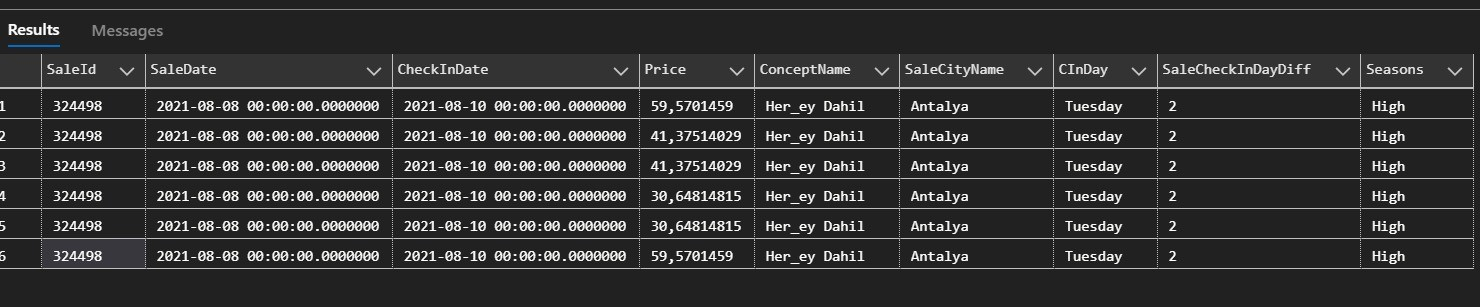


In [20]:
df.index

RangeIndex(start=0, stop=59164, step=1)

In [21]:
# Unique şehir sayısını ve frekanslarını hesaplayarak veri setimizdeki unique şehirleri öğrenip frekanslarını göreceğiz.
unique_cities = df["SaleCityName"].value_counts()

print("Unique Şehir Sayısı:", unique_cities.count())
print("\nŞehirlerin Frekanslar:\n", unique_cities)

Unique Şehir Sayısı: 6

Şehirlerin Frekanslar:
 SaleCityName
Antalya    31649
Muğla      10662
Aydın      10646
Diğer       3245
İzmir       2507
Girne        455
Name: count, dtype: int64


## Toplamda 6 adet unique şehir var. 5 farklı şehir diyebiliriz. 1 adet "Diğer" isimli değişkenimiz var.

In [23]:
# Kaç unique Konsept olduğu ve Konsept başına kaçar adet satış olduğunu çğreniyoruz.
unique_concepts = df["ConceptName"].value_counts()

print("Unique konsept sayısı:", unique_concepts.count())
print("\nKonsept Başına Toplam Satış Sayıları:\n", unique_concepts)

Unique konsept sayısı: 3

Konsept Başına Toplam Satış Sayıları:
 ConceptName
Herşey Dahil      53186
Yarım Pansiyon     3559
Oda + Kahvaltı     2419
Name: count, dtype: int64


In [24]:
df["Price"] = df["Price"].astype(str)

In [25]:
# Şehir başına ne kadar kar elde edildiğini öğreniyoruz.
         #Price sütunu object olarak gözüküyor. Bu da Count ile elde ettiğimz satış adetlerini price ile çarpmamızı, 
     # yani toplam karı hesaplamamızı engelliyor. Bunun için onu int değere dönüştürüyoruz.
df["Price"] = df["Price"].str.replace(",", ".").astype(float)
df["Price"] = df["Price"].round(2)

# Daha sonra işlemimize devam ediyoruz.
city_sales = df.groupby("SaleCityName").agg(
    Toplam_Satis=("SaleId", "count"),
    Toplam_Kar=("Price", "sum")
).reset_index()
 # Toplam karları daha anlaşılır şekilde göstermek için virgüllü göstermek istiyorum. Bu yüzden bi format değişikliği yapıyoruz.
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8') 
city_sales["Toplam_Kar"] = city_sales["Toplam_Kar"].apply(lambda x: locale.format_string("%.2f", x, grouping=True))

city_sales_df = pd.DataFrame(city_sales, columns = ["Toplam_Kar","Toplam_Satis","SaleCityName"])

# Bu değişikliği Toplam_Satiş için yapmıyorum. Bunun nedeni fiyat bilgisinde anlamlı bir bilgi çıktısı veriyor. Ancak topla satış adet bazında ve anlaşılır biçimde.

city_sales_df.sort_values(by=['Toplam_Satis'],ascending = False)


,Toplam_Kar,Toplam_Satis,SaleCityName
0,"2,042,044.49",31649,Antalya
4,"665,966.03",10662,Muğla
1,"573,351.89",10646,Aydın
2,"154,808.06",3245,Diğer
5,"166,129.41",2507,İzmir
3,"27,065.21",455,Girne


In [26]:
# Konceptlerin hangilerinden ne kadar satış elde edildiğini öğreniyoruz.
concept_sales = df.groupby("ConceptName").agg(
    Toplam_Satis_Adedi=("SaleId", "count"),
    Toplam_Kar=("Price", "sum")
).reset_index()

# Sütun isimlerini düzenliyoruz.
concept_sales = concept_sales.rename(columns={"ConceptName": "Konsept İsmi", "Toplam_Kar": "Toplam Kar"})

# Sonuçlar:
concept_sales.head()

,Konsept İsmi,Toplam_Satis_Adedi,Toplam Kar
0,Herşey Dahil,53186,3333324.59
1,Oda + Kahvaltı,2419,121518.02
2,Yarım Pansiyon,3559,174522.48


In [27]:
#Şehir başına olan ortalama kazançları sıralıyoruz.
city_avg_price = df.groupby("SaleCityName")["Price"].mean().reset_index()

# Ortalama Price değerine göre büyükten küçüğe sıralama yapıyoruz. Böylece daha anlamlı bir çıktı alacağız.
city_avg_price = city_avg_price.sort_values(by="Price", ascending=False)

# Sütun isimlerini düzenliyoruz.
city_avg_price = city_avg_price.rename(columns={"SaleCityName": "Şehir", "Price": "Ortalama Price"})

# Sonuçlar:
city_avg_price.head()

,Şehir,Ortalama Price
5,İzmir,66.266219
0,Antalya,64.521612
4,Muğla,62.461642
3,Girne,59.483978
1,Aydın,53.856086


In [28]:
#Konsept başına olan ortalama kazançları sıralıyoruz.
concept_avg_price = df.groupby("ConceptName")["Price"].mean().reset_index()

# Price ortalamalarına göre büyükten küçüğe sıralayalım
concept_avg_price = concept_avg_price.sort_values(by="Price", ascending=False)

# Sütun isimlerini değiştirelim
concept_avg_price = concept_avg_price.rename(columns={"ConceptName": "Konsept İsmi", "Price": "Ortalama Price"})

# Sonuçları:
concept_avg_price.head()

,Konsept İsmi,Ortalama Price
0,Herşey Dahil,62.672970
1,Oda + Kahvaltı,50.234816
2,Yarım Pansiyon,49.036943


In [29]:
concept_sum_price = df.groupby("ConceptName")["Price"].sum().reset_index()
concept_sum_price = concept_sum_price.rename(columns={"ConceptName": "Konsept İsmi", "Price": "Toplam Kazanç"})

In [30]:
# Şehir ve Konsept kırılımına göre Price ortalamalarını görmek istiyoruz. Bunun için bi groupby yöntemi uygulayacağız.

city_concept_avg_price = df.groupby(["SaleCityName", "ConceptName"])["Price"].mean().reset_index()

# Price ortalamalarına göre büyükten küçüğe sıralayalım
city_concept_avg_price = city_concept_avg_price.sort_values(by="Price", ascending=False)

# Sütun isimlerini değiştirelim
city_concept_avg_price = city_concept_avg_price.rename(columns={"SaleCityName": "Şehir", "ConceptName": "Konsept İsmi", "Price": "Ortalama Price"})

# Sonuçlar:
city_concept_avg_price.head()

,Şehir,Konsept İsmi,Ortalama Price
9,Girne,Herşey Dahil,97.681132
6,Diğer,Herşey Dahil,84.771225
15,İzmir,Herşey Dahil,74.701751
2,Antalya,Yarım Pansiyon,67.191172
0,Antalya,Herşey Dahil,64.519163


#### * SaleCheckInDayDiff değişkenini kategorik bir değişkene çeviriyoruz.

In [32]:
# Aralıkları ve bunlara karşılık gelen isimleri tanımlayalım
bins = [0, 7, 30, 90, df['SaleCheckInDayDiff'].max()]
labels = ["Last Minuters", "Potential Planners", "Planners", "Early Bookers"]

# SaleCheckInDayDiff değişkenini bu aralıklara göre sınıflandıralım
df["Booking_Type"] = pd.cut(df["SaleCheckInDayDiff"], bins=bins, labels=labels, right=False)


# Her Booking_Type için ortalama Price değerlerini hesaplayalım
booking_type_avg_price = df.groupby("Booking_Type")["Price"].mean().reset_index()

# Sonuçlar:
booking_type_avg_price.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_2692\846134256.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_type_avg_price = df.groupby("Booking_Type")["Price"].mean().reset_index()


,Booking_Type,Price
0,Last Minuters,59.613394
1,Potential Planners,61.050886
2,Planners,64.605135
3,Early Bookers,63.898807


In [33]:
# Aldığımız çıktıya göre görüyoruz ki Planner ve Early Booker olarak sınıflandırdığımız müşteriler,
# daha çok getiri sağlıyorlar.

In [34]:
# SaleCheckInDayDiff değişkenini bu aralıklara göre sınıflandıralım
df["EB_Score"] = pd.cut(df["SaleCheckInDayDiff"], bins=bins, labels=labels, right=False)

# Gerekli kırılımlarda gruplama ve özetleme işlemleri
agg_df = df.groupby(["SaleCityName", "ConceptName", "EB_Score", "Seasons", "CInDay"]).agg(
    Avg_Price=("Price", "mean"),
    Transaction_Count=("SaleId", "count")
).reset_index()

# Sütun isimlerini daha anlamlı hale getirelim
agg_df = agg_df.rename(columns={
    "SaleCityName": "Şehir",
    "ConceptName": "Konsept",
    "EB_Score": "EB Skoru",
    "Seasons": "Sezon",
    "CInDay": "Giriş Günü",
    "Avg_Price": "Ortalama Fiyat",
    "Transaction_Count": "İşlem Sayısı"
})

# agg_df'i csv olarak kaydediyoruz. Türkçe karakter sıkıntısızı çekmemek için encoding ekliyoruz.

agg_df.to_csv("agg_df.csv", index=False, encoding='utf-8')

# Sonuçlar:
agg_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_2692\3472301520.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(["SaleCityName", "ConceptName", "EB_Score", "Seasons", "CInDay"]).agg(


,Şehir,Konsept,EB Skoru,Sezon,Giriş Günü,Ortalama Fiyat,İşlem Sayısı
0,Antalya,Herşey Dahil,Last Minuters,High,Friday,62.714887,1776
1,Antalya,Herşey Dahil,Last Minuters,High,Monday,59.224316,1770
2,Antalya,Herşey Dahil,Last Minuters,High,Saturday,62.879485,1651
3,Antalya,Herşey Dahil,Last Minuters,High,Sunday,63.779343,1264
4,Antalya,Herşey Dahil,Last Minuters,High,Thursday,64.211553,1558


In [35]:
agg_df.head(20)

,Şehir,Konsept,EB Skoru,Sezon,Giriş Günü,Ortalama Fiyat,İşlem Sayısı
0,Antalya,Herşey Dahil,Last Minuters,High,Friday,62.714887,1776
1,Antalya,Herşey Dahil,Last Minuters,High,Monday,59.224316,1770
2,Antalya,Herşey Dahil,Last Minuters,High,Saturday,62.879485,1651
3,Antalya,Herşey Dahil,Last Minuters,High,Sunday,63.779343,1264
4,Antalya,Herşey Dahil,Last Minuters,High,Thursday,64.211553,1558
5,Antalya,Herşey Dahil,Last Minuters,High,Tuesday,64.934828,1392
6,Antalya,Herşey Dahil,Last Minuters,High,Wednesday,68.486118,1319
7,Antalya,Herşey Dahil,Last Minuters,Low,Friday,54.703259,494
8,Antalya,Herşey Dahil,Last Minuters,Low,Monday,64.953843,281
9,Antalya,Herşey Dahil,Last Minuters,Low,Saturday,54.195010,519


In [36]:
df.groupby(["SaleCityName","ConceptName"]).agg({"Price" : "mean"})

Price
SaleCityName ConceptName              
Antalya      Herşey Dahil    64.519163
             Oda + Kahvaltı  63.504883
             Yarım Pansiyon  67.191172
Aydın        Herşey Dahil    53.995646
             Oda + Kahvaltı  34.458684
             Yarım Pansiyon  30.016452
Diğer        Herşey Dahil    84.771225
             Oda + Kahvaltı  37.599146
             Yarım Pansiyon  42.113686
Girne        Herşey Dahil    97.681132
             Oda + Kahvaltı  39.776475
             Yarım Pansiyon  53.248000
Muğla        Herşey Dahil    63.020239
             Oda + Kahvaltı  59.037878
             Yarım Pansiyon  45.120160
İzmir        Herşey Dahil    74.701751
             Oda + Kahvaltı  41.320088
             Yarım Pansiyon  59.610491

In [37]:
#Yeni seviye tabanlı satışları tanımlayınız ve veri setine değişken olarak ekleyeceğim. bu seviye tabanlı katman "sales_level_based" olacak. bunu "SaleCityName_ConceptName_Seasons",
# yani örnek olarak "Antalya_HerşeyDahil_High" şeklinde yapacağız.

agg_df["sales_level_based"] = agg_df.apply(
    lambda row: f'{row["Şehir"]}-{row["Konsept"]}-{row["Sezon"]}', axis=1
)


# agg_df'i kaydedelim
agg_df.to_csv("agg_df_with_sales_level_based.csv", index=False, encoding="utf-8")


# Sonuçlar:
agg_df.head()

,Şehir,Konsept,EB Skoru,Sezon,Giriş Günü,Ortalama Fiyat,İşlem Sayısı,sales_level_based
0,Antalya,Herşey Dahil,Last Minuters,High,Friday,62.714887,1776,Antalya-Herşey Dahil-High
1,Antalya,Herşey Dahil,Last Minuters,High,Monday,59.224316,1770,Antalya-Herşey Dahil-High
2,Antalya,Herşey Dahil,Last Minuters,High,Saturday,62.879485,1651,Antalya-Herşey Dahil-High
3,Antalya,Herşey Dahil,Last Minuters,High,Sunday,63.779343,1264,Antalya-Herşey Dahil-High
4,Antalya,Herşey Dahil,Last Minuters,High,Thursday,64.211553,1558,Antalya-Herşey Dahil-High


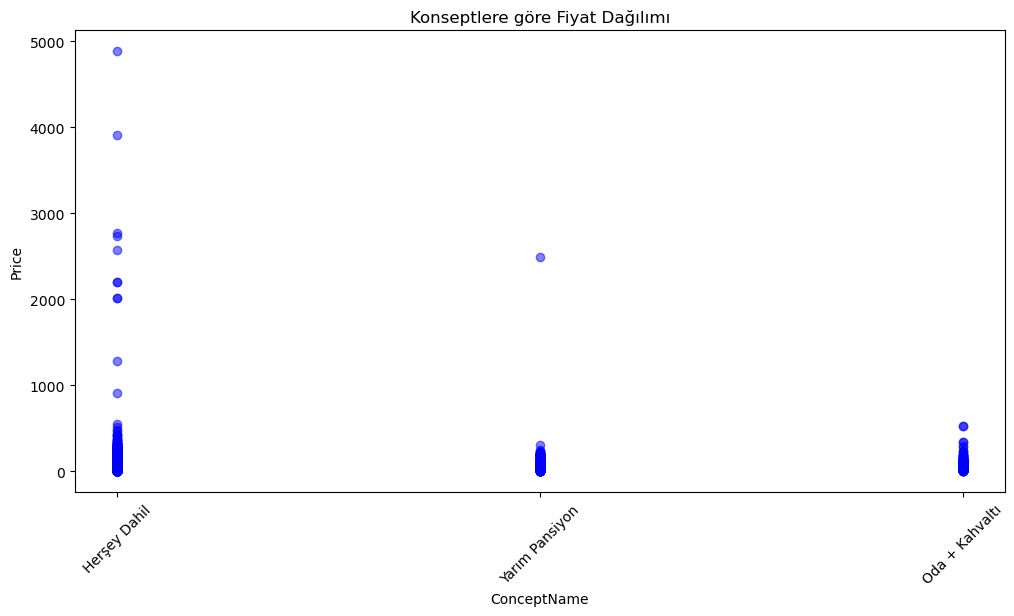

In [38]:
#Konseptler ve Price değişkeni arasındaki ilişkiyi görmek için scatterplot kullanıyoruz.

plt.figure(figsize=(12, 6))
plt.scatter(df['ConceptName'], df['Price'], color='blue', alpha=0.5)
plt.title("Konseptlere göre Fiyat Dağılımı")
plt.xlabel("ConceptName")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

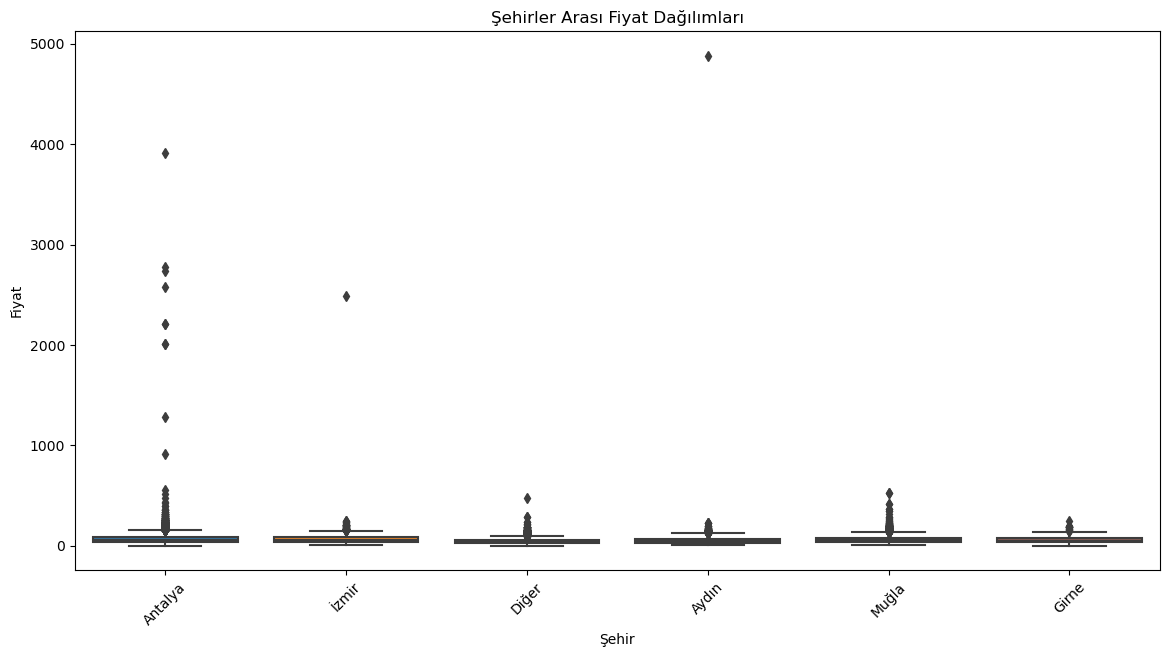

In [40]:
# SaleCityName değişkenini label encoder kullanarak sayısal değere dönüştürüyoruz.
label_encoder = LabelEncoder()
df["SaleCityName_encoded"] = label_encoder.fit_transform(df["SaleCityName"])

# Şehir ve Price değişkeni arasındaki ilişkiyi görmek için scatterplot kullanıyoruz.


plt.figure(figsize=(14, 7))
sns.boxplot(x="SaleCityName", y="Price", data=df)
plt.title("Şehirler Arası Fiyat Dağılımları")
plt.xlabel("Şehir")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.show()

# * Konsept-Price ve Şehir-Price dağılımları birbirine benzer tablolar veriyorlar. Bunun temel nedeni Antalya'nın daha fazla Herşey Dahil otele sahip olması. Böylece daha fazla "yüksek" price'a sahip bir dağılım oluşuyor.

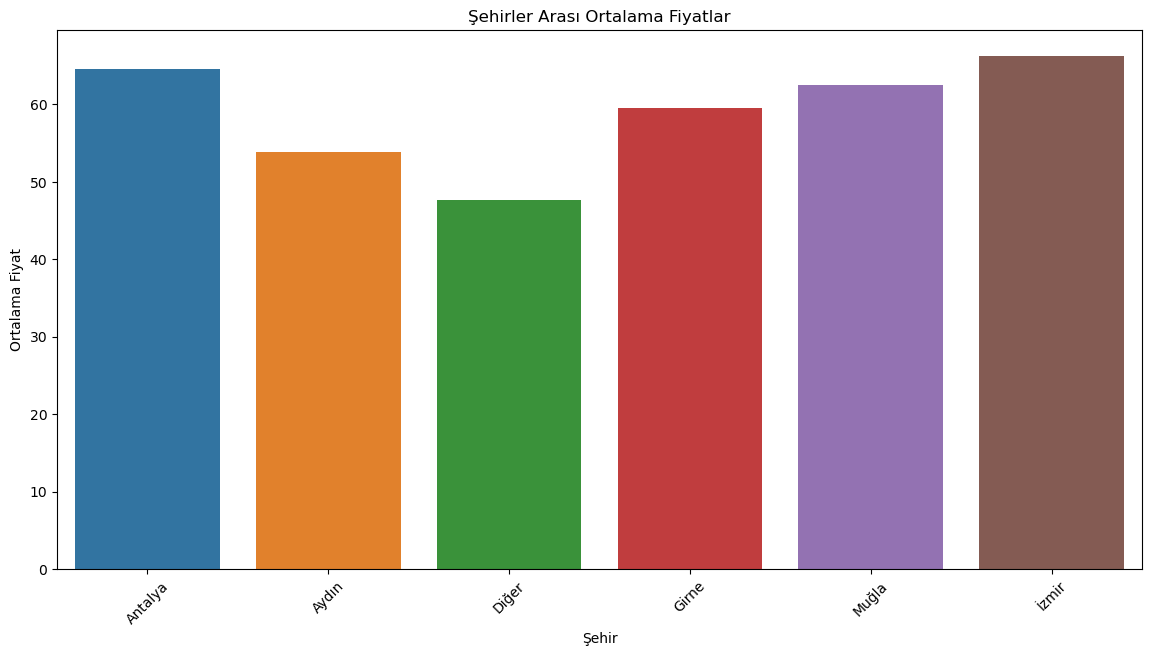

In [42]:
# Şehirler arası fiyat ortalamalarını hesaplayalım
city_price_mean = df.groupby("SaleCityName")["Price"].mean().reset_index()

# Bar plot ile şehirler arası fiyat ortalamalarını görselleştirelim
plt.figure(figsize=(14, 7))
sns.barplot(x="SaleCityName", y="Price", data=city_price_mean)
plt.title("Şehirler Arası Ortalama Fiyatlar")
plt.xlabel("Şehir")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation=45)
plt.show()

## * Şehirler Arası Fiyat Ortalamalarına baktığımızda daha önceki ortalama değer tablomuzda gördüğümüz gibi; İzmir'in ortalamada en pahalı, daha sonra Antalya, daha sonra da Muğla şehirlerini görüyoruz.

## * Ancak burada gördüğümüz fiyatlar şehirlerdeki satışlarla orantılı olmadığı için tam olarak doğru bir izlenim vermiyor. 
## Satışlarla doğru orantılı bir değerlendirmede hangi şehrin daha karlı olduğunu önceki çıktımızda görmüştük.

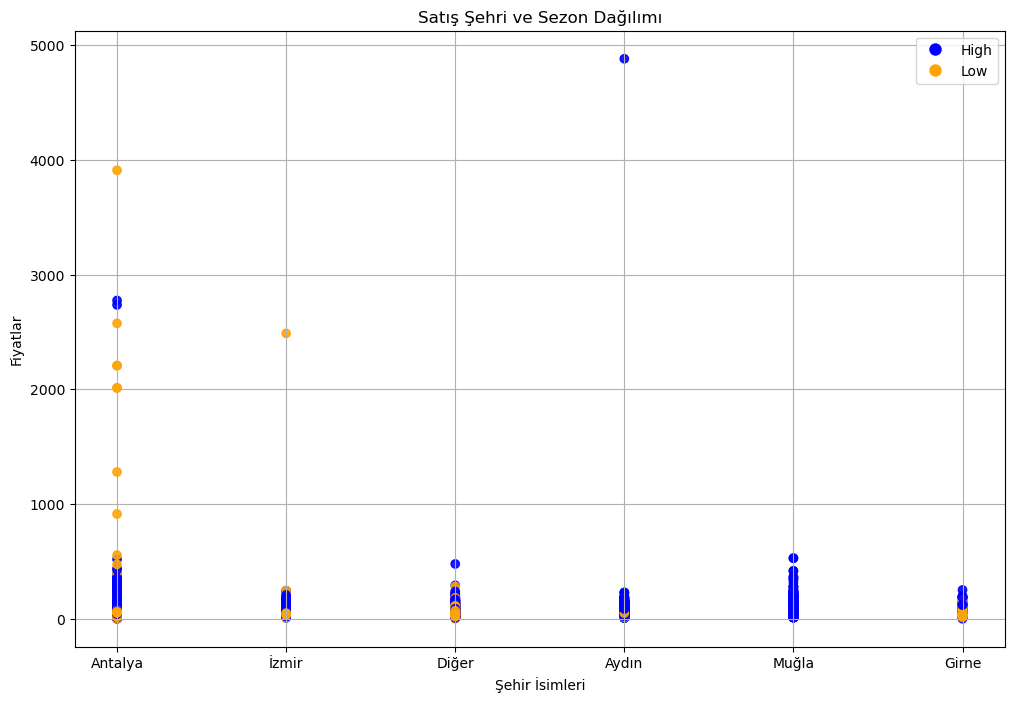

In [45]:

# tablomuz
plt.figure(figsize=(12, 8))
colors = {"High": "blue", "Low": "orange"}
plt.scatter(df["SaleCityName"], df["Price"], c=df["Seasons"].apply(lambda x: colors[x]), alpha=0.9)
plt.title("Satış Şehri ve Sezon Dağılımı")
plt.xlabel("Şehir İsimleri")
plt.ylabel("Fiyatlar")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=10, label=k) for k, v in colors.items()])
plt.grid(True)
plt.show()

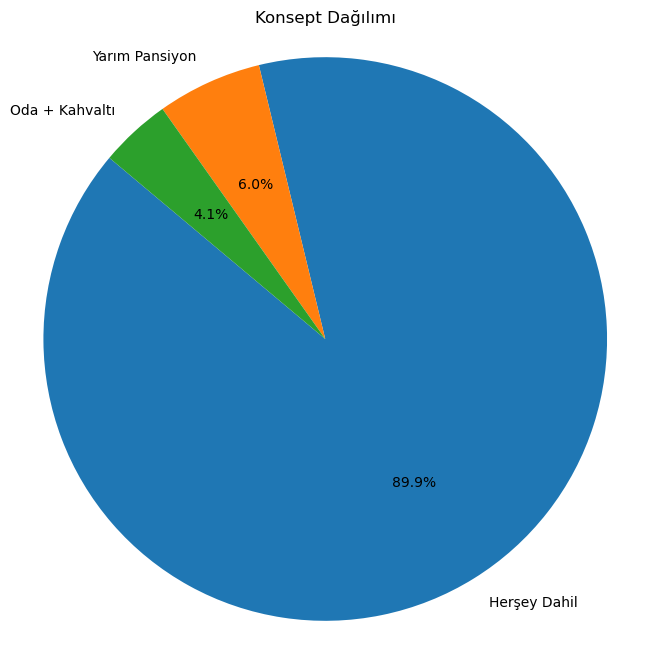

In [46]:
#ConceptName'ler string ifade olduğu için onları önce kendi içinde sum işlevi ile saydırıyoruz. 
# Yapılan sayıma göre yüzdelik dağılıma çeviriyoruz.
concept_counts = df['ConceptName'].value_counts()
concept_percentages = concept_counts / concept_counts.sum() * 100

# Pie plot:
plt.figure(figsize=(8, 8))
plt.pie(concept_percentages, labels=concept_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Konsept Dağılımı')
plt.axis('equal')  # Pie plot'un daire şeklinde olmasını sağlar
plt.show()

## * PowerBI da kullanmak için her şehiri kendi içinde "Price" "SaleId" gibi bilgileriyle birlikte ayrı csv'ler olarak kayıt ediyoruz.

In [48]:
# Her şehir için ayrı dataframe oluşturma ve kaydetme
cities = df['SaleCityName'].unique()

for city in cities:
    city_df = df[df['SaleCityName'] == city]
    city_sales_count = city_df['SaleId'].count()
    city_avg_price = city_df['Price'].mean()
    
    result_df = pd.DataFrame({
        'SaleCityName': [city],
        'TotalSales': [city_sales_count],
        'AveragePrice': [city_avg_price]
    })
    
    # Dataframe'i CSV dosyası olarak kaydetme
    result_df.to_csv(f'{city}_sales_data.csv', index=False)

# Orijinal verilere göre her şehrin satışlarını ve fiyatlarını içeren dataframeleri kaydetme
for city in cities:
    city_df = df[df['SaleCityName'] == city]
    city_df.to_csv(f'{city}_details.csv', index=False)

## Bütün şehirlerin csv'lerini okutuyoruz.

In [50]:
# Antalya
antalya_data = pd.read_csv("Antalya_details.csv")
antalya_sales_data = pd.read_csv("Antalya_sales_data.csv")

In [51]:
antalya_data.info

<bound method DataFrame.info of        SaleId                     SaleDate                  CheckInDate  \
0      415122  2022-12-03 00:00:00.0000000  2022-12-03 00:00:00.0000000   
1      415103  2022-12-03 00:00:00.0000000  2022-12-03 00:00:00.0000000   
2      404034  2022-09-12 00:00:00.0000000  2022-09-13 00:00:00.0000000   
3      415085  2022-12-03 00:00:00.0000000  2022-12-09 00:00:00.0000000   
4      415084  2022-12-03 00:00:00.0000000  2022-12-03 00:00:00.0000000   
...       ...                          ...                          ...   
31644   51824  2016-01-05 00:00:00.0000000  2016-10-10 00:00:00.0000000   
31645   51820  2016-01-05 00:00:00.0000000  2016-10-10 00:00:00.0000000   
31646   51817  2016-01-05 00:00:00.0000000  2016-10-10 00:00:00.0000000   
31647   51816  2016-01-05 00:00:00.0000000  2016-10-10 00:00:00.0000000   
31648   51731  2016-01-04 00:00:00.0000000  2016-08-22 00:00:00.0000000   

        Price     ConceptName SaleCityName    CInDay  SaleCheckInDa

In [52]:
# Aydın
aydın_data = pd.read_csv("Aydın_details.csv")
aydın_sales_data = pd.read_csv("Aydın_sales_data.csv")

In [191]:
aydın_data.head(20)

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,Booking_Type,EB_Score,SaleCityName_encoded
0,414740,2022-11-29 00:00:00.0000000,2023-07-10 00:00:00.0000000,125.43,Herşey Dahil,Aydın,Monday,223,High,Early Bookers,Early Bookers,1
1,366284,2022-05-06 00:00:00.0000000,2022-07-15 00:00:00.0000000,40.70,Herşey Dahil,Aydın,Friday,70,High,Planners,Planners,1
2,411092,2022-10-30 00:00:00.0000000,2022-10-30 00:00:00.0000000,47.59,Herşey Dahil,Aydın,Sunday,0,Low,Last Minuters,Last Minuters,1
3,411019,2022-10-28 00:00:00.0000000,2022-10-29 00:00:00.0000000,43.65,Herşey Dahil,Aydın,Saturday,1,Low,Last Minuters,Last Minuters,1
4,411009,2022-10-28 00:00:00.0000000,2022-10-29 00:00:00.0000000,43.65,Herşey Dahil,Aydın,Saturday,1,Low,Last Minuters,Last Minuters,1
5,410997,2022-10-28 00:00:00.0000000,2022-10-28 00:00:00.0000000,47.59,Herşey Dahil,Aydın,Friday,0,Low,Last Minuters,Last Minuters,1
6,410982,2022-10-28 00:00:00.0000000,2022-10-29 00:00:00.0000000,39.29,Herşey Dahil,Aydın,Saturday,1,Low,Last Minuters,Last Minuters,1
7,410979,2022-10-28 00:00:00.0000000,2022-10-29 00:00:00.0000000,39.29,Herşey Dahil,Aydın,Saturday,1,Low,Last Minuters,Last Minuters,1
8,410945,2022-10-28 00:00:00.0000000,2022-10-28 00:00:00.0000000,47.59,Herşey Dahil,Aydın,Friday,0,Low,Last Minuters,Last Minuters,1
9,410941,2022-10-28 00:00:00.0000000,2022-10-29 00:00:00.0000000,43.65,Herşey Dahil,Aydın,Saturday,1,Low,Last Minuters,Last Minuters,1


In [53]:
# Muğla
mugla_data = pd.read_csv("Muğla_details.csv")
mugla_sales_data = pd.read_csv("Muğla_sales_data.csv")

In [55]:
# İzmir
izmir_data = pd.read_csv("İzmir_details.csv")
izmir_sales_data = pd.read_csv("İzmir_sales_data.csv")

In [58]:
# Girne
girne_data = pd.read_csv("Girne_details.csv")
girme_sales_data = pd.read_csv("Girne_sales_data.csv")

In [59]:
# Diğer
diger_data = pd.read_csv("Diğer_details.csv")
diger_sales_data = pd.read_csv("Diğer_sales_data.csv")

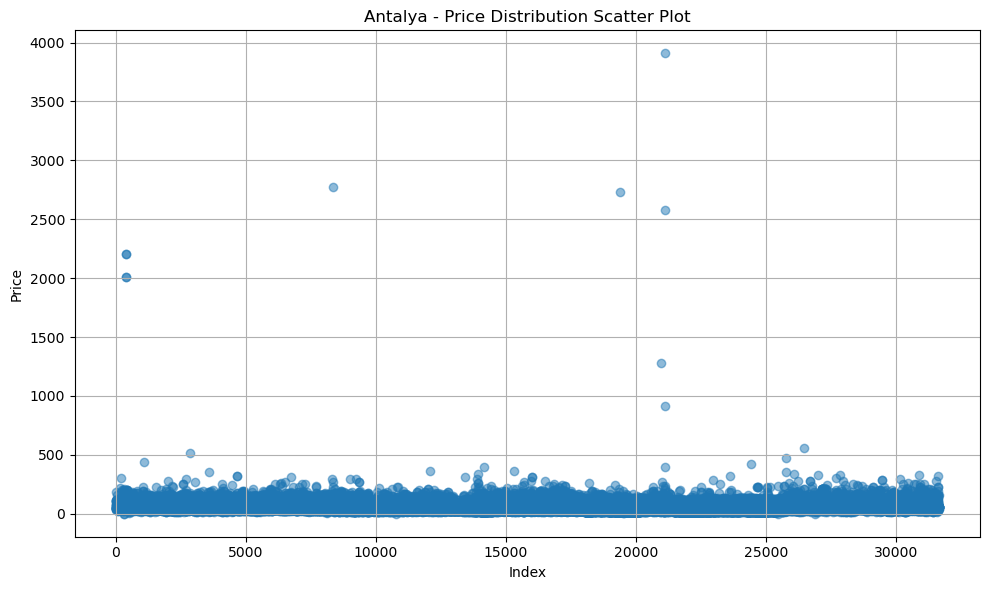

In [60]:
# Antalya Fiyat Dağılımı
plt.figure(figsize=(10, 6))
plt.scatter(range(len(antalya_data)), antalya_data['Price'], alpha=0.5)
plt.title('Antalya - Price Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

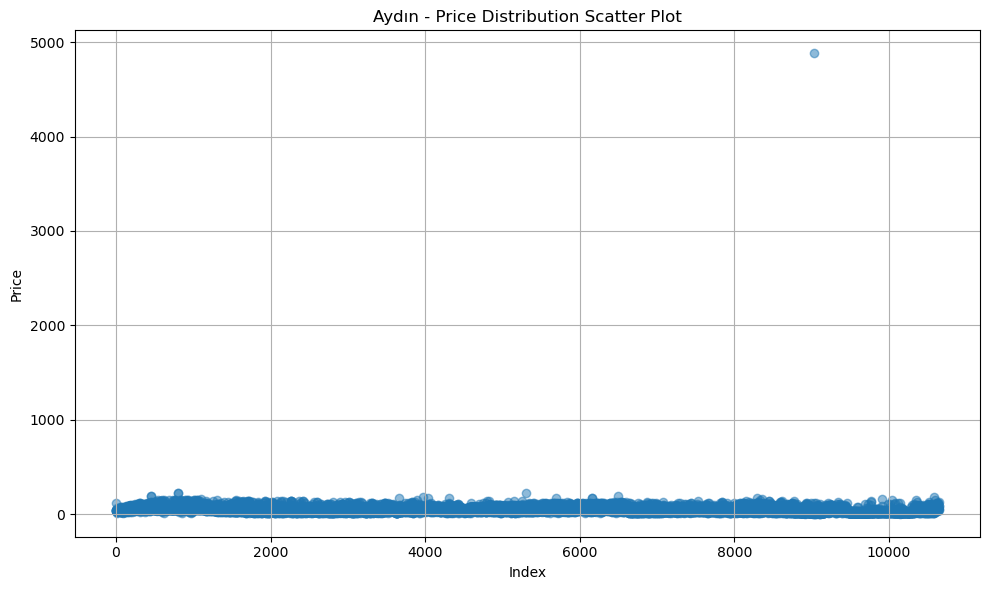

In [61]:
# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(range(len(aydın_data)), aydın_data['Price'], alpha=0.5)
plt.title('Aydın - Price Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

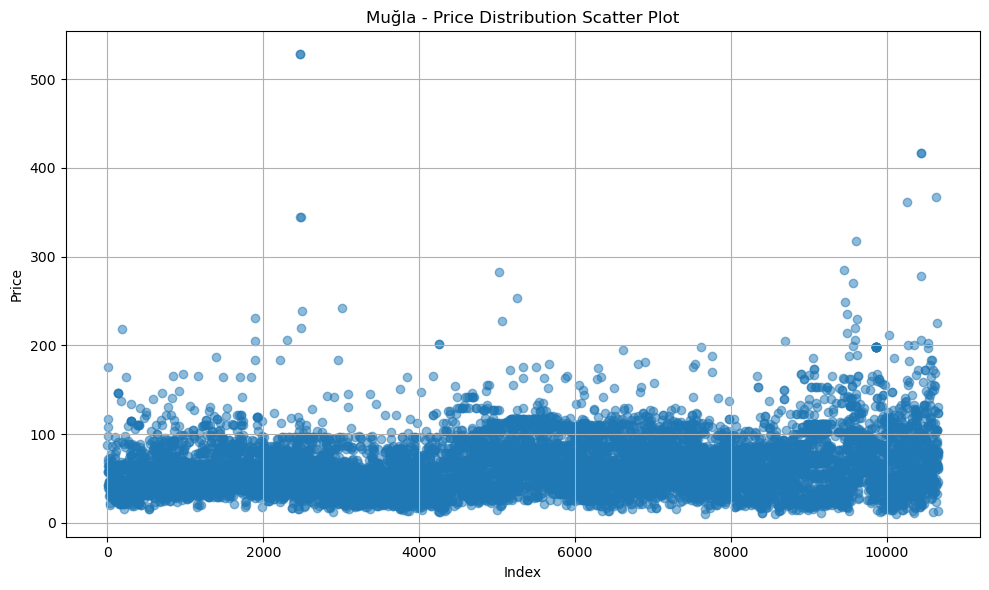

In [62]:
# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mugla_data)), mugla_data['Price'], alpha=0.5)
plt.title('Muğla - Price Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

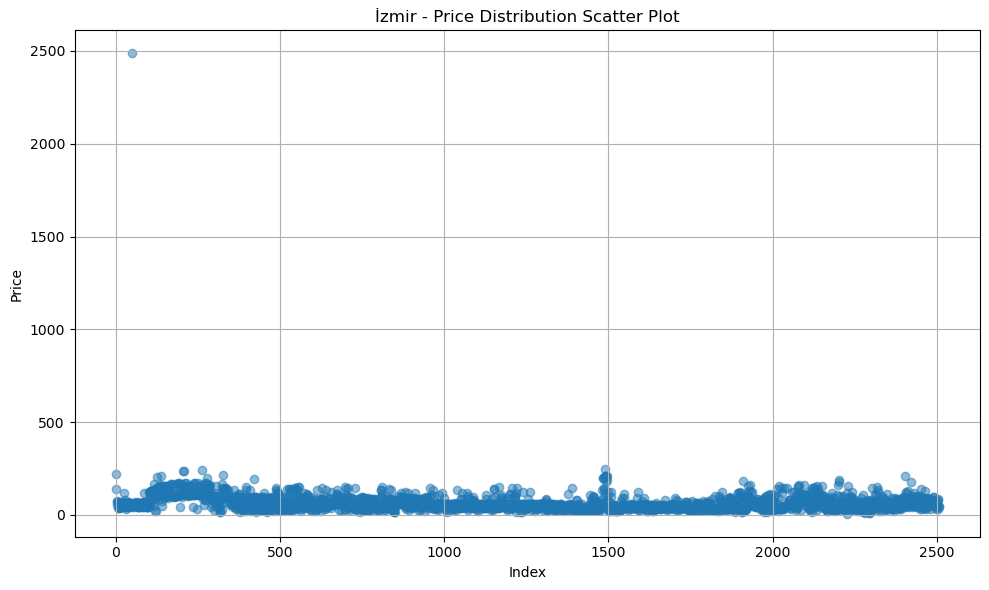

In [65]:
# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(range(len(izmir_data)), izmir_data['Price'], alpha=0.5)
plt.title('İzmir - Price Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

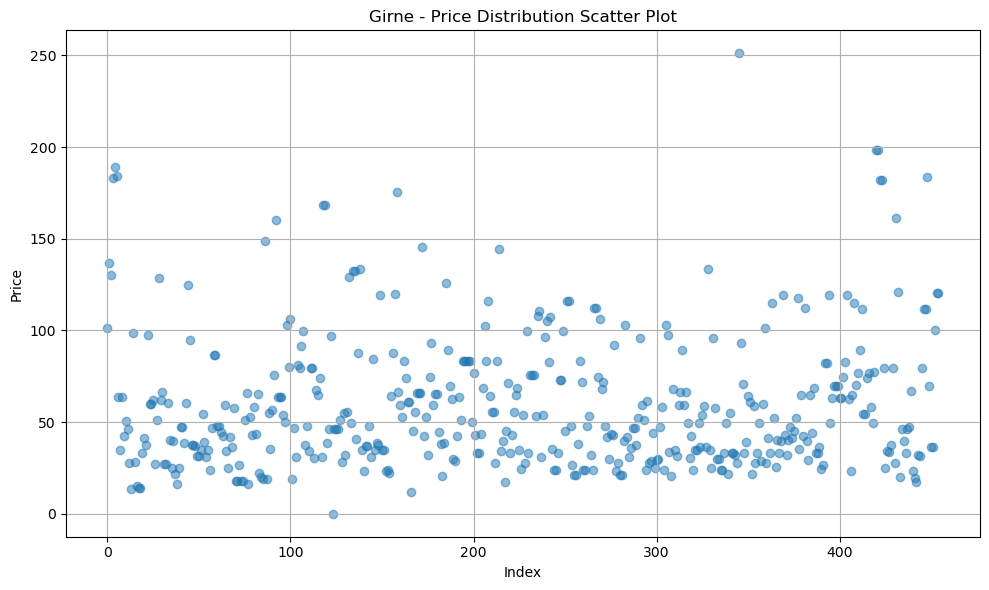

In [72]:
# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(range(len(girne_data)), girne_data['Price'], alpha=0.5)
plt.title('Girne - Price Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

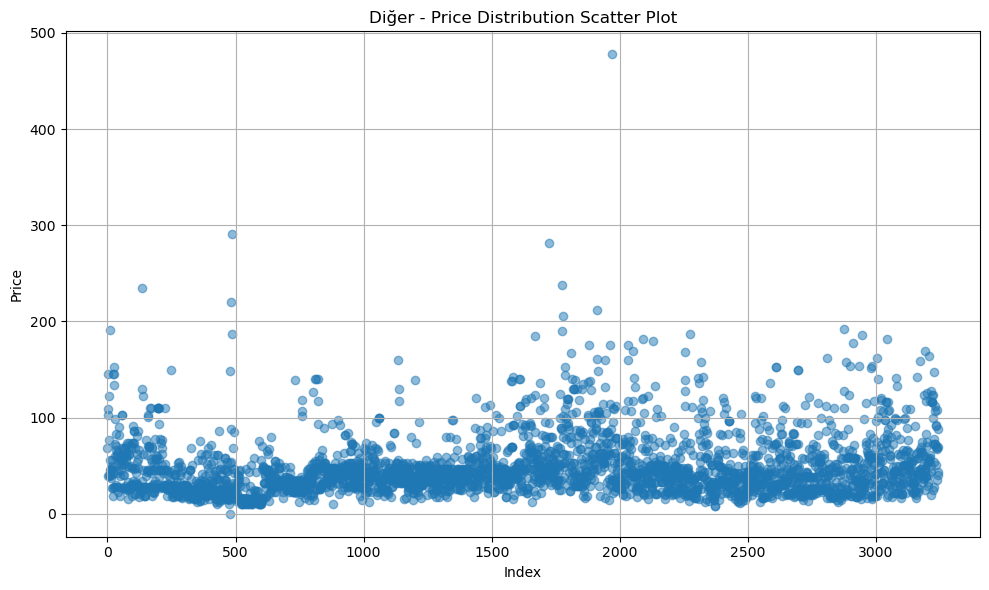

In [77]:
# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
plt.scatter(range(len(diger_data)), diger_data['Price'], alpha=0.5)
plt.title('Diğer - Price Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

## * Modellerimizi oluşturma zamanı

In [93]:
!pip install lazypredict 
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split


In [126]:
## Öncelikle en başarılı modeli tespit etmek için LazyClassifier kullanıyoruz.

In [116]:
izmir_drop = ["CheckInDate" , "SaleDate"]
izmir_data.drop(columns=izmir_drop, inplace=True)

In [150]:
# Girdi özellikleri (X) ve hedef değişken (y) belirleme
X = izmir_data.drop(['Price'], axis=1)  # Price dışındaki diğer özellikler
y = izmir_data['Price']  # Price hedef değişkeni

# Eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LazyRegressor modelini tanımlama
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Model performanslarını ekrana yazdırma
print(models)

 98%|█████████▊| 41/42 [00:12<00:00,  3.67it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 2005, number of used features: 22
[LightGBM] [Info] Start training from score 67.116065


100%|██████████| 42/42 [00:13<00:00,  3.18it/s]

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
XGBRegressor                                 0.48       0.49    23.62   
BaggingRegressor                             0.46       0.47    23.99   
KNeighborsRegressor                          0.39       0.40    25.54   
ExtraTreesRegressor                          0.38       0.40    25.65   
RandomForestRegressor                        0.28       0.30    27.68   
NuSVR                                        0.25       0.26    28.30   
MLPRegressor                                 0.25       0.26    28.40   
ExtraTreeRegressor                           0.23       0.25    28.64   
DecisionTreeRegressor                        0.23       0.24    28.67   
SVR                                          0.22       0.24    28.79   
HistGradientBoostingRegressor                0.20       0.22    29.19   
HuberRegressor                               0.20  

In [181]:
df.to_csv(f'gezinomi_powerbi.csv', index=False)

In [183]:
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons,Booking_Type,EB_Score,SaleCityName_encoded
0,415122,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,79.30,Herşey Dahil,Antalya,Saturday,0,Low,Last Minuters,Last Minuters,0
1,415103,2022-12-03 00:00:00.0000000,2022-12-03 00:00:00.0000000,45.97,Yarım Pansiyon,Antalya,Saturday,0,Low,Last Minuters,Last Minuters,0
2,404034,2022-09-12 00:00:00.0000000,2022-09-13 00:00:00.0000000,77.84,Herşey Dahil,Antalya,Tuesday,1,High,Last Minuters,Last Minuters,0
3,415094,2022-12-03 00:00:00.0000000,2022-12-10 00:00:00.0000000,222.71,Yarım Pansiyon,İzmir,Saturday,7,Low,Potential Planners,Potential Planners,5
4,414951,2022-12-01 00:00:00.0000000,2022-12-03 00:00:00.0000000,140.48,Yarım Pansiyon,İzmir,Saturday,2,Low,Last Minuters,Last Minuters,5
